In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)  # Show all columns

In [3]:
# from azureml.core import Workspace, Dataset

# # Get the current working directory
# current_dir = os.getcwd()

# # Construct the absolute path
# config_path = os.path.join(current_dir, 'config.json')
# print("Absolute path to config.json:", config_path)

# # Use the absolute path in the from_config method
# workspace = Workspace.from_config(path=config_path)
# dataset = Dataset.get_by_name(workspace, name='BiMl')
# dataframe = dataset.to_pandas_dataframe()

In [4]:
df = pd.read_csv('clean_crimes.csv')
df

,DR_NO,Date_Rptd,DATE_OCC,DATE_TIME_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1_2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
0,1307355,2010-02-20,2010-02-20,2010-02-20 13:50:00,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0,48,M,H,501,SINGLE FAMILY DWELLING,0,NaN,AA,Adult Arrest,900,0,0,0,300 E GAGE AV,NaN,33.9825,-118.2695
1,90631215,2010-01-05,2010-01-05,2010-01-05 01:50:00,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,0,47,F,W,101,STREET,102,HAND GUN,IC,Invest Cont,900,998,0,0,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
2,100100501,2010-01-03,2010-01-02,2010-01-02 21:00:00,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",400,47,F,H,103,ALLEY,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122,0,0,0,8TH ST,SAN PEDRO ST,34.0387,-118.2488
3,100100506,2010-01-05,2010-01-04,2010-01-04 16:50:00,1650,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0,23,M,B,404,DEPARTMENT STORE,0,NaN,AA,Adult Arrest,442,0,0,0,700 W 7TH ST,NaN,34.0480,-118.2577
4,100100508,2010-01-08,2010-01-07,2010-01-07 20:05:00,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,344,46,M,H,101,STREET,0,NaN,IC,Invest Cont,330,0,0,0,PICO BL,GRAND AV,34.0389,-118.2643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327092,231606525,2023-03-22,2023-03-22,2023-03-22 10:00:00,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0,25,F,H,102,SIDEWALK,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230,0,0,0,12800 FILMORE ST,NaN,34.2790,-118.4116
2327093,231210064,2023-04-12,2023-04-12,2023-04-12 16:30:00,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0,29,M,B,222,LAUNDROMAT,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230,0,0,0,6100 S VERMONT AV,NaN,33.9841,-118.2915
2327094,230115220,2023-07-02,2023-07-01,2023-07-01 00:01:00,1,1,Central,154,1,352,PICKPOCKET,0,24,F,H,735,NIGHT CLUB (OPEN EVENINGS ONLY),0,NaN,IC,Invest Cont,352,0,0,0,500 S MAIN ST,NaN,34.0467,-118.2485
2327095,230906458,2023-03-05,2023-03-05,2023-03-05 09:00:00,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,53,F,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,NaN,IC,Invest Cont,745,0,0,0,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [5]:
# Assuming df is your DataFrame
data = df.copy()

# Convert 'DATE_TIME_OCC' into datetime objects and extract features
data['DATE_TIME_OCC'] = pd.to_datetime(data['DATE_TIME_OCC'])
data['Month'] = data['DATE_TIME_OCC'].dt.month
data['Hour'] = data['DATE_TIME_OCC'].dt.hour

In [6]:
# Step 2: Find Duplicates
# `keep=False` marks all duplicates as True
duplicates = data.duplicated('DR_NO', keep=False)

# Step 3: Filter Duplicates
duplicates_df = data[duplicates]

# Step 4: Examine Differences
# Sorting by 'DR_NO' to group the duplicates together for easier comparison
sorted_duplicates_df = duplicates_df.sort_values(by='DR_NO')

# Displaying the relevant columns for comparison
sorted_duplicates_df[['DR_NO', 'Part_1_2', 'Crm_Cd', 'Status']]

,DR_NO,Part_1_2,Crm_Cd,Status
801184,211517655,2,903,AA
1891019,211517655,2,903,AA
1937069,211517656,1,230,IC
757888,211517656,1,230,IC
697973,211517657,2,624,IC
...,...,...,...,...
1989953,232116483,2,354,IC
1869630,232117017,2,354,IC
809717,232117017,2,354,IC
1934895,232117502,2,354,IC


In [11]:
data = data[data['DATE_TIME_OCC'] >= '2021-01-01']
data['Arrest'] = (data['Status_Desc'].isin(['Adust Arrest', 'Juv Arrest'])).astype(int)
data['Serious'] = data['Part_1_2'].map({1: 0, 2: 1})
data

,DR_NO,Date_Rptd,DATE_OCC,DATE_TIME_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1_2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON,Month,Hour,Arrest,Serious
650187,230606221,2023-02-22,2021-09-11,2021-09-11 15:00:00,1500,6,Hollywood,669,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0,44,F,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,NaN,IC,Invest Cont,440,0,0,0,1100 N KINGSLEY DR,NaN,34.0908,-118.3025,9,15,0,0
650190,220804464,2022-01-12,2021-09-01,2021-09-01 12:00:00,1200,8,West LA,841,1,480,BIKE - STOLEN,0,31,M,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,NaN,IC,Invest Cont,480,0,0,0,12400 ROCHESTER AV,NaN,34.0396,-118.4671,9,12,0,0
650191,211908874,2021-05-20,2021-05-19,2021-05-19 19:15:00,1915,19,Mission,1925,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0,43,F,H,501,SINGLE FAMILY DWELLING,511,VERBAL THREAT,AA,Adult Arrest,930,0,0,0,14700 POLK ST,NaN,34.2998,-118.4585,5,19,0,1
650194,211706591,2021-03-16,2021-03-16,2021-03-16 17:00:00,1700,17,Devonshire,1728,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",329,41,F,W,501,SINGLE FAMILY DWELLING,0,NaN,IC,Invest Cont,740,0,0,0,18400 RINALDI PL,NaN,34.2748,-118.5349,3,17,0,1
650197,211700966,2021-12-12,2021-11-01,2021-11-01 12:00:00,1200,17,Devonshire,1795,1,310,BURGLARY,0,38,M,O,501,SINGLE FAMILY DWELLING,0,NaN,IC,Invest Cont,310,0,0,0,8600 AMESTOY AV,NaN,34.2267,-118.5070,11,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327092,231606525,2023-03-22,2023-03-22,2023-03-22 10:00:00,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0,25,F,H,102,SIDEWALK,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230,0,0,0,12800 FILMORE ST,NaN,34.2790,-118.4116,3,10,0,0
2327093,231210064,2023-04-12,2023-04-12,2023-04-12 16:30:00,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0,29,M,B,222,LAUNDROMAT,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230,0,0,0,6100 S VERMONT AV,NaN,33.9841,-118.2915,4,16,0,0
2327094,230115220,2023-07-02,2023-07-01,2023-07-01 00:01:00,1,1,Central,154,1,352,PICKPOCKET,0,24,F,H,735,NIGHT CLUB (OPEN EVENINGS ONLY),0,NaN,IC,Invest Cont,352,0,0,0,500 S MAIN ST,NaN,34.0467,-118.2485,7,0,0,0
2327095,230906458,2023-03-05,2023-03-05,2023-03-05 09:00:00,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,53,F,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,NaN,IC,Invest Cont,745,0,0,0,14500 HARTLAND ST,NaN,34.1951,-118.4487,3,9,0,1


In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

numeric_features = ['Hour', 'AREA', 'Premis_Cd', 'Vict_Age', 'Arrest']
categorical_features = ['Vict_Sex', 'Vict_Descent']

# Split the data
y = data['Serious']
X = data[numeric_features + categorical_features]  # Ensure 'Serious' is not included here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assume 'data' is your DataFrame and has been preprocessed appropriately

# Adding interaction terms and polynomial features to numeric features
poly_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('select', SelectFromModel(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), threshold='median'))
])

# Updated preprocessor with polynomial feature pipeline for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('scaler', StandardScaler()), ('poly', poly_transformer)]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the model pipeline with XGBoost and SMOTE, including polynomial features
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Expanded and refined hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 6, 9],
    'classifier__subsample': [0.7, 0.9],
    'classifier__colsample_bytree': [0.7, 0.9],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__min_child_weight': [1, 5, 10]
}

# Using RandomizedSearchCV for more efficient hyperparameter optimization
random_search = RandomizedSearchCV(model_pipeline, param_grid, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Make predictions
y_pred = random_search.predict(X_test)

# Evaluate the model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Consider multi-class strategy if applicable

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_child_weight=5, classifier__n_estimators=500, classifier__subsample=0.9; total time= 1.1min
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_child_weight=5, classifier__n_estimators=500, classifier__subsample=0.9; total time= 1.3min
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_child_weight=5, classifier__n_estimators=500, classifier__subsample=0.9; total time= 1.4min
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_child_weight=5, classifier__n_estimators=500, classifier__subsample=0.9; total time= 1.5min
[CV] END classifie

In [13]:
print(f"Accuracy on test set: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.6985390370448226
ROC AUC Score: 0.6985147444486983
              precision    recall  f1-score   support

           0       0.71      0.70      0.71     53923
           1       0.69      0.70      0.69     50734

    accuracy                           0.70    104657
   macro avg       0.70      0.70      0.70    104657
weighted avg       0.70      0.70      0.70    104657



In [20]:
# Step 1: Ensure y_pred is a Series with the same index as X_test
y_pred_series = pd.Series(y_pred, index=X_test.index)

# Step 2: Merge the predictions back to the original DataFrame
data['Predicted_Serious'] = y_pred_series


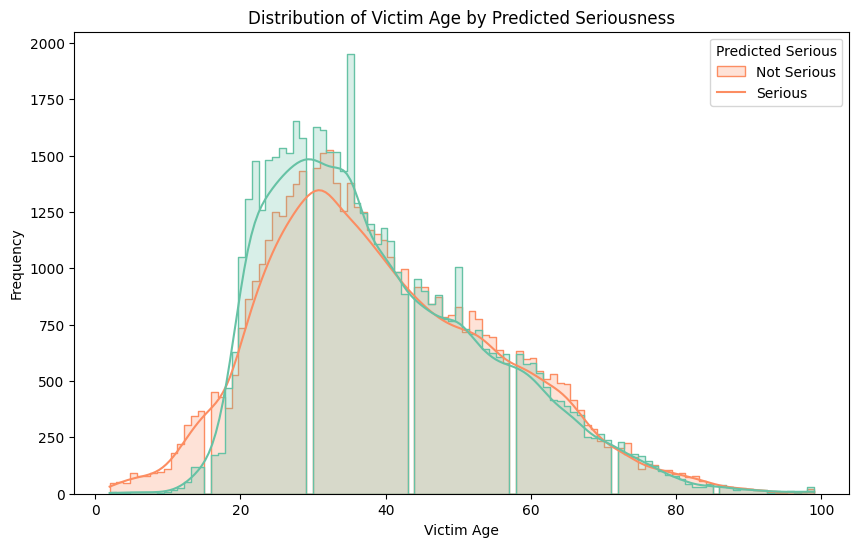

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Vict_Age', hue='Predicted_Serious', kde=True, element='step', palette='Set2')
plt.title('Distribution of Victim Age by Predicted Seriousness')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.legend(title='Predicted Serious', labels=['Not Serious', 'Serious'])


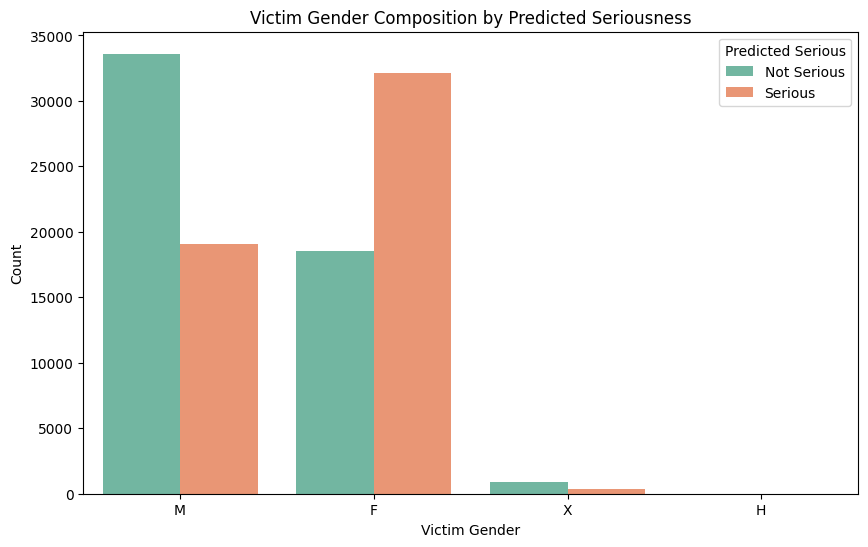

In [ ]:
# Victim Gender Composition
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Vict_Sex', hue='Predicted_Serious', palette='Set2')
plt.title('Victim Gender Composition by Predicted Seriousness')
plt.xlabel('Victim Gender')
plt.ylabel('Count')
plt.legend(title='Predicted Serious', labels=['Not Serious', 'Serious'])

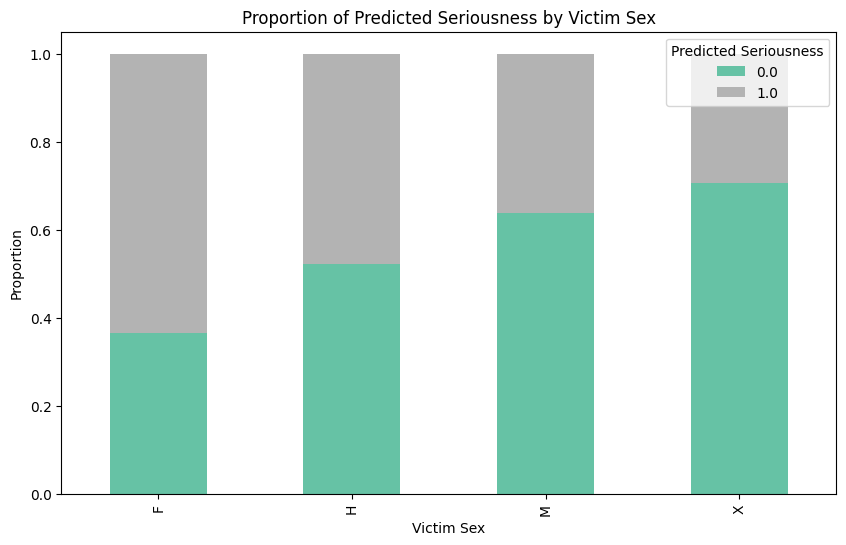

In [25]:
# Creating a crosstab for 'Vict_Sex' and 'Predicted_Serious'
ct = pd.crosstab(data['Vict_Sex'], data['Predicted_Serious'], normalize='index')

# Plotting stacked bar chart
ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Proportion of Predicted Seriousness by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Proportion')
plt.legend(title='Predicted Seriousness', loc='upper right')
plt.show()


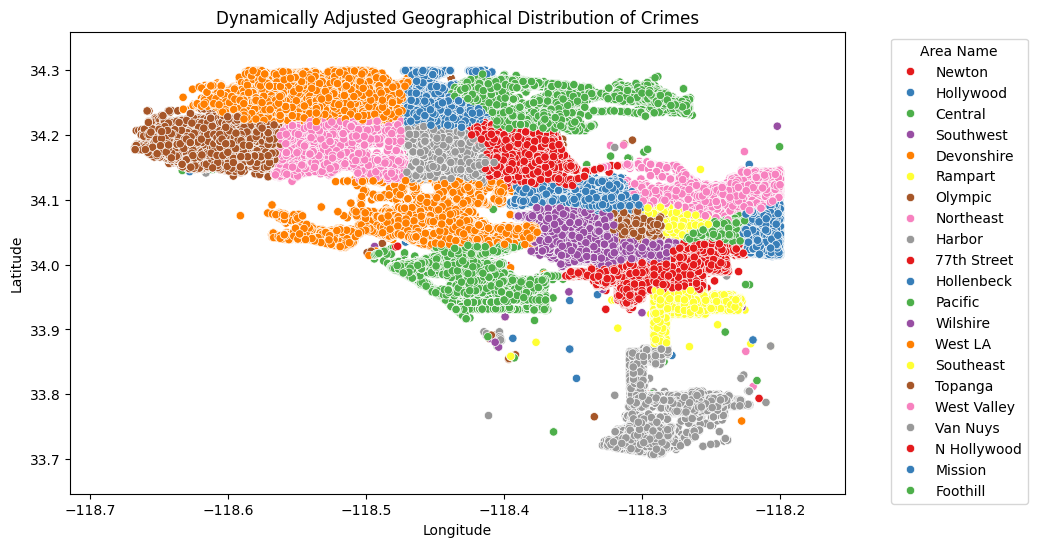

In [27]:
import seaborn as sns

# Calculate the buffer to add beyond the min and max for padding in the plot
lat_buffer = (df['LAT'].max() - df['LAT'].min()) * 0.1
lon_buffer = (df['LON'].max() - df['LON'].min()) * 0.1

# Set the limits for latitude and longitude with the calculated buffer
lat_min, lat_max = df['LAT'].min() - lat_buffer, df['LAT'].max() + lat_buffer
lon_min, lon_max = df['LON'].min() - lon_buffer, df['LON'].max() + lon_buffer

# Visualization: Adjusted Geographical Distribution of Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LON', y='LAT', data=df, hue='AREA_NAME', palette='Set1')

# Set the title and labels
plt.title('Dynamically Adjusted Geographical Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust the scales for better clarity
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

# Place the legend outside the plot
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

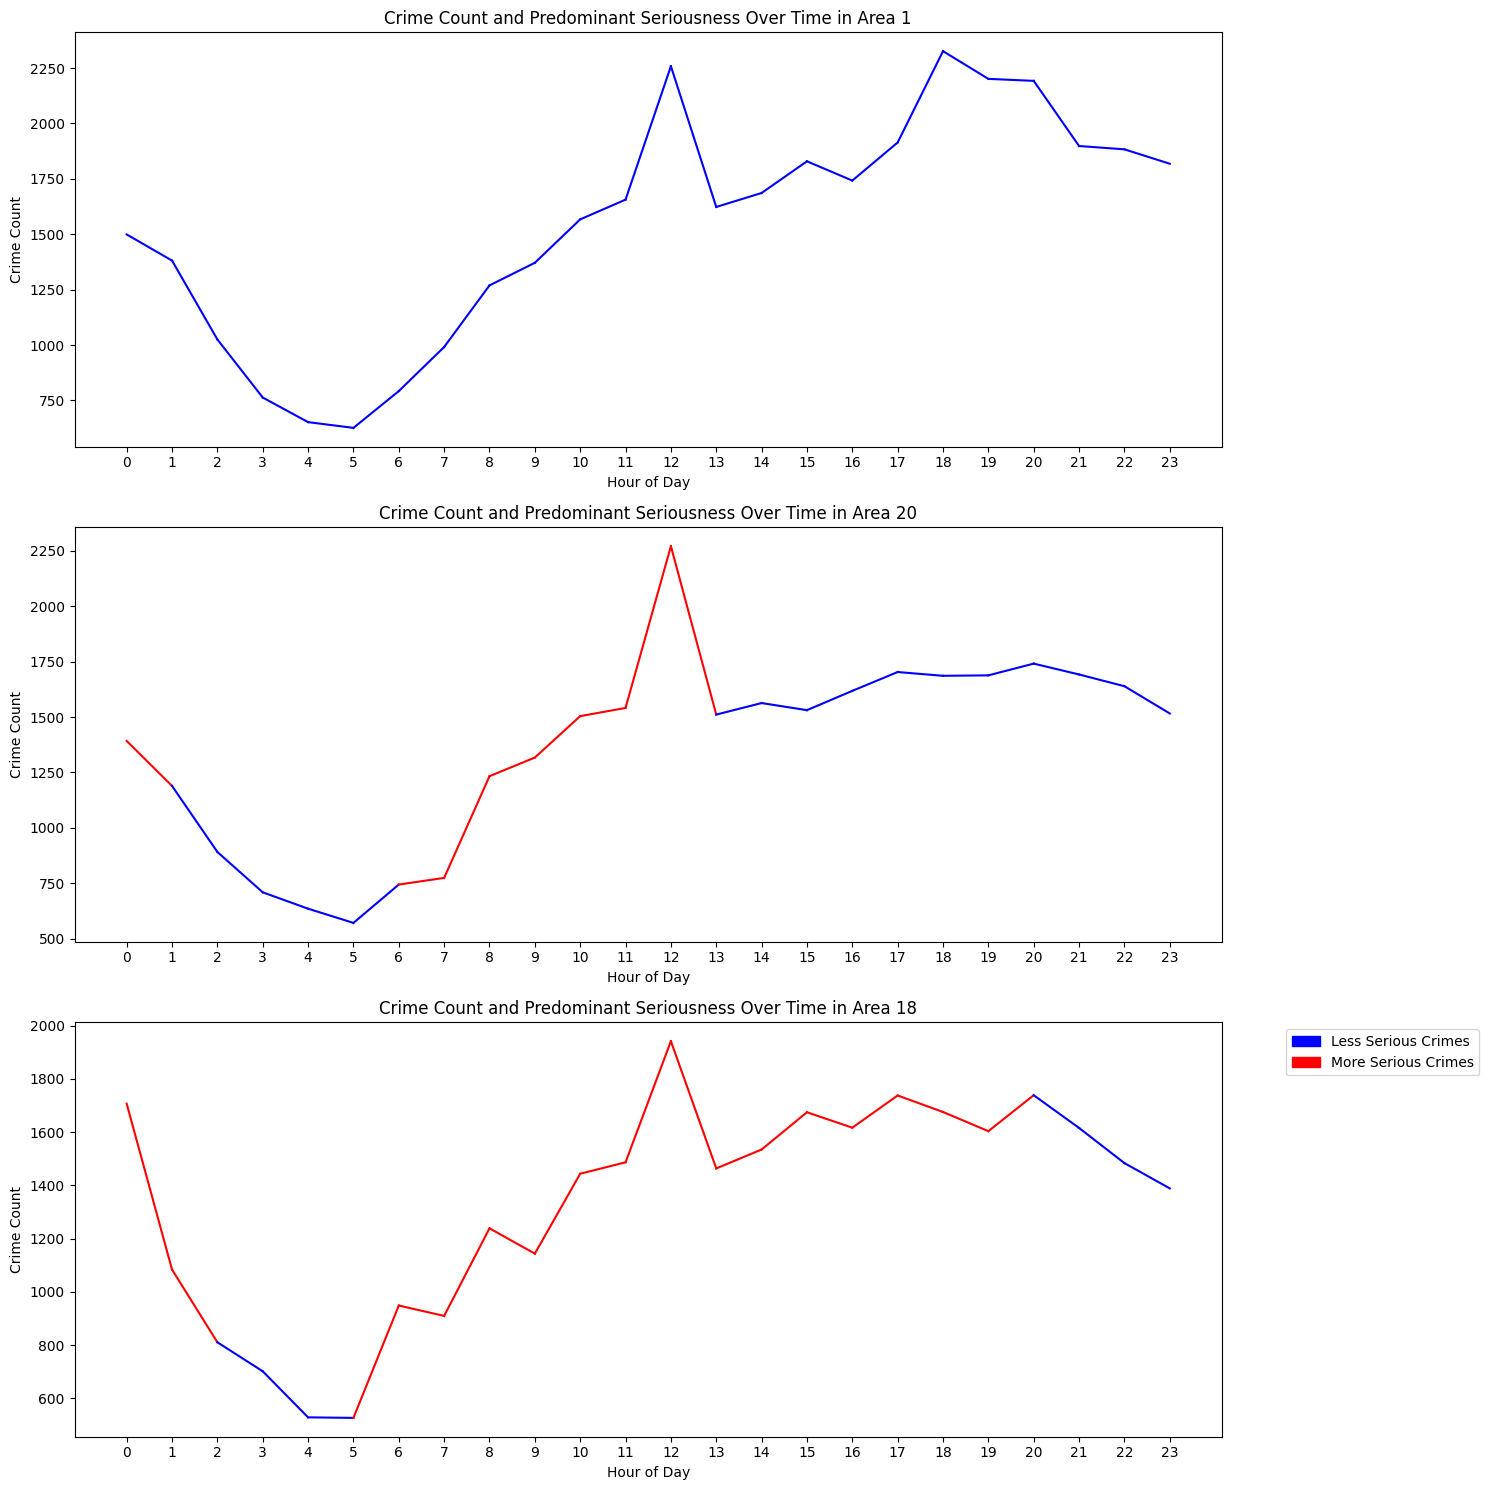

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Determine the top 3 areas with the most crimes
top_3_areas = data['AREA'].value_counts().head(3).index

# Plot setup
plt.figure(figsize=(15, 5 * len(top_3_areas)))

# Colors for lines based on the class
colors = {0: 'blue', 1: 'red'}

for i, area in enumerate(top_3_areas, 1):
    # Filter data for the current area
    area_data = data[data['AREA'] == area]
    
    # Group by hour and get the count and the most frequent class
    hourly_data = area_data.groupby('Hour').agg(
        Crime_Count=('AREA', 'count'),
        Predominant_Class=('Serious', lambda x: x.mode()[0])  # Assumes 'Serious' is either 0 or 1
    ).reset_index()
    
    # Plot
    plt.subplot(len(top_3_areas), 1, i)
    for hour in range(23):
        # Determine the color based on the predominant class
        line_color = colors[hourly_data.loc[hour, 'Predominant_Class']]
        
        # Draw the line segment
        plt.plot(hourly_data['Hour'].iloc[hour:hour+2],
                 hourly_data['Crime_Count'].iloc[hour:hour+2],
                 color=line_color)

    plt.title(f'Crime Count and Predominant Seriousness Over Time in Area {area}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Crime Count')
    plt.xticks(range(24))

# Create a custom legend to indicate color encoding
less_serious_patch = mpatches.Patch(color='blue', label='Less Serious Crimes')
more_serious_patch = mpatches.Patch(color='red', label='More Serious Crimes')
plt.legend(handles=[less_serious_patch, more_serious_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the combined plot
plt.tight_layout()
plt.show()


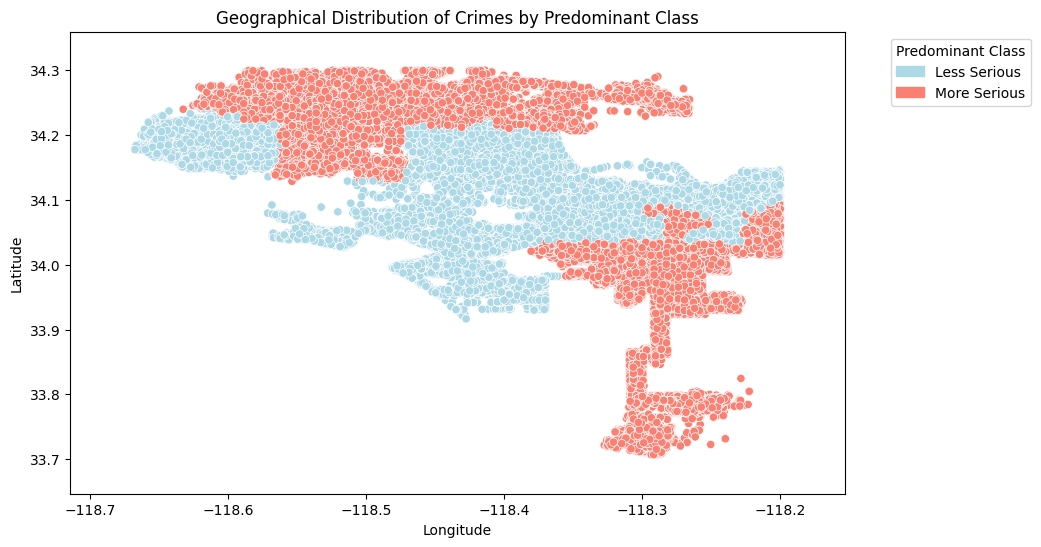

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Assuming 'data' is your DataFrame and it has columns 'LON', 'LAT', 'AREA', and 'Serious'

# Calculate the predominant class for each area
predominant_class = data.groupby('AREA')['Serious'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Map the predominant class back to the original DataFrame
data['Predominant_Class'] = data['AREA'].map(predominant_class)

# Set up the color palette for the two classes
palette = {0: 'lightblue', 1: 'salmon'}  # Adjust colors as needed

# Calculate the buffer for latitude and longitude for padding in the plot
lat_buffer = (data['LAT'].max() - data['LAT'].min()) * 0.1
lon_buffer = (data['LON'].max() - data['LON'].min()) * 0.1

# Set the limits for latitude and longitude with the calculated buffer
lat_min, lat_max = data['LAT'].min() - lat_buffer, data['LAT'].max() + lat_buffer
lon_min, lon_max = data['LON'].min() - lon_buffer, data['LON'].max() + lon_buffer

# Visualization: Adjusted Geographical Distribution of Crimes with Predominant Class Colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LON', y='LAT', data=data, hue='Predominant_Class', palette=palette, legend=None)

# Set the title and labels
plt.title('Geographical Distribution of Crimes by Predominant Class')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust the scales for better clarity
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

# Custom legend
less_serious_patch = mpatches.Patch(color='lightblue', label='Less Serious')
more_serious_patch = mpatches.Patch(color='salmon', label='More Serious')
plt.legend(handles=[less_serious_patch, more_serious_patch], title='Predominant Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
